# Optimization

In this tutorial we walk through the different configurations during optimization.

In [1]:
import numpy as np
from qiskit.circuit.library import TwoLocal
from IPython.display import display
import qtpu

In [2]:
N = 20
circuit = TwoLocal(N, ["ry", "rz"], "cx", entanglement="linear", reps=2).decompose()
circuit = circuit.assign_parameters(
    {param: np.random.rand() * np.pi / 2 for param in circuit.parameters}
)
circuit.measure_all()

In [3]:
from optuna.visualization.matplotlib import plot_pareto_front
from qtpu.compiler import hyper_optimize, trial_to_hybrid_tn


study = hyper_optimize(circuit, max_cost=[0, 10000, 20000], n_trials=300, show_progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

/tmp/ipykernel_1187748/3407153204.py:1: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  ax = plot_pareto_front(study, target_names=["cost", "Success Probability"])


<Axes: title={'center': 'Pareto-front Plot'}, xlabel='cost', ylabel='Success Probability'>

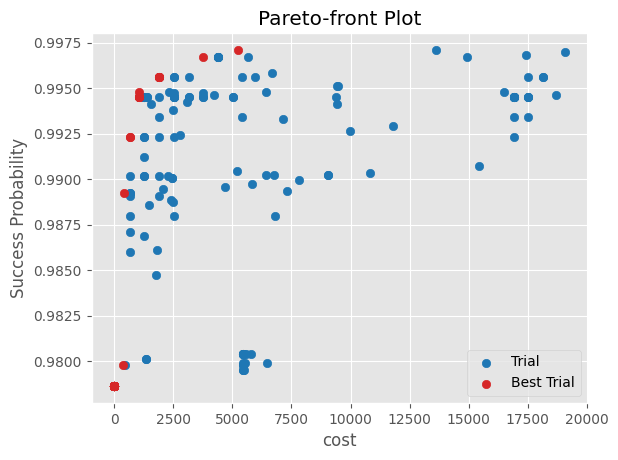

In [4]:
ax = plot_pareto_front(study, target_names=["cost", "Success Probability"])
# ax.set_xscale("log")
ax

In [5]:
for trial in study.best_trials:
    print(trial.values)

[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[1900.0, 0.9956094467695648]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[650.0, 0.992329186985131]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[1050.0, 0.9945148237990713]
[0.0, 0.9786305524228531]
[650.0, 0.992329186985131]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[1900.0, 0.9956094467695648]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[0.0, 0.9786305524228531]
[

In [6]:
trials = sorted(study.best_trials, key=lambda t: (t.values[1], t.values[0]))

x = np.array([t.values[0] for t in trials[-3:]])
y = np.array([t.values[1] for t in trials[-3:]]) *100
y
x
print(x)
print(y)
np.gradient(y, x)

[1900. 3775. 5232.]
[99.56094468 99.67052745 99.71040563]


array([5.84441482e-05, 4.09579801e-05, 2.73700618e-05])

In [7]:
htn = qtpu.cut(circuit, max_cost=20000, n_trials=300, show_progress_bar=True)
for qt in htn.quantum_tensors:
    print(qt.circuit.num_qubits)

  0%|          | 0/300 [00:00<?, ?it/s]

2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
